## Visualizando embeddings

In [ ]:
!pip install google-cloud-aiplatform mplcursors ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00


In [ ]:
REGION = 'us-central1'
PROJECT_ID = 'sinensia'

#### Detalles del proyecto

In [ ]:
# Import and initialize the Vertex AI Python SDK
from google.colab import auth
auth.authenticate_user()
from google.cloud import aiplatform

aiplatform.init(project=PROJECT_ID, location=REGION)

## Capturando significado con embeddings

In [ ]:
in_1 = "Hemos observado un ibis volando hacia la laguna"

in_2 = "Avistada una nutria en la costa"

in_3 = "Un perro parece divertirse con los delfines"


in_4 = "La ensalada de aguacate está deliciosa!"

in_5 = "Me encanta la comida japonesa!"


in_6 = "Los programadores de Python son gente genial"

in_7 = "TypeScript, C++ o Java? Todos molan!"


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [ ]:
import numpy as np
from vertexai.language_models import TextEmbeddingModel
embedding_model = TextEmbeddingModel.from_pretrained(
    "textembedding-gecko-multilingual@001")

- Obtenemos embeddings para todas las piezas de texto.
- Las almacenamos en un array NumPy 2D (una fila por cada embedding).

In [ ]:
embeddings = []
for input_text in input_text_lst_news:
    emb = embedding_model.get_embeddings(
        [input_text])[0].values
    embeddings.append(emb)

embeddings_array = np.array(embeddings)

In [ ]:
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

#### Reducimos embeddings de 768 a 2 dimensiones para visualización
- Usamos Análisis de Componente Principal (PCA).


In [ ]:
from sklearn.decomposition import PCA

# PCA para visualiz. 2D
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [ ]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[-0.3451602  -0.07900795]
 [-0.38211743 -0.13880491]
 [-0.23201867 -0.2141394 ]
 [-0.00753633  0.43733343]
 [ 0.13149559  0.41917416]
 [ 0.33320252 -0.18567058]
 [ 0.50213451 -0.23888475]]


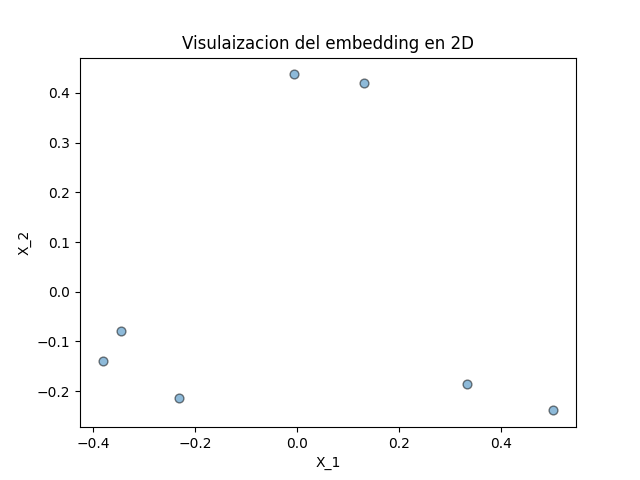

/usr/local/lib/python3.10/dist-packages/mplcursors/_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import mplcursors


def plot_2D(x_values, y_values, labels):

    # Creamos scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha = 0.5,
                         edgecolors='k',
                         s = 40)

    # Creamos a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Visulaizacion del embedding en 2D')
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12)

    plt.show()


plot_2D(new_values[:,0], new_values[:,1], input_text_lst_news)

#### Embeddings and Similarity
- Plot a heat map to compare the embeddings of sentences that are similar and sentences that are dissimilar.

In [ ]:
in_1 = """La cebra come de la planta."""

in_2 = """En la planta surgió un llama"""

in_3 = """Las bacterias pueden aguantar periodos largos de falta de agua."""

in_4 = """Algunos microorganismos son resistentes
          a la escasez de agua."""

input_text_lst_sim = [in_1, in_2, in_3, in_4]

In [ ]:
embeddings = []
for input_text in input_text_lst_sim:
    emb = embedding_model.get_embeddings([input_text])[0].values
    embeddings.append(emb)

embeddings_array = np.array(embeddings)

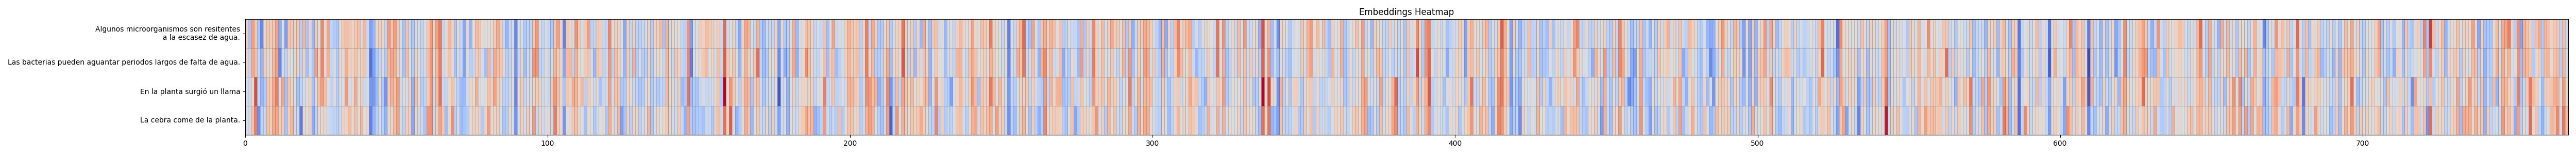

In [ ]:
def plot_heatmap(data, x_labels=None, y_labels=None, title=None):
    fig, ax = plt.subplots(figsize=(50, 3))
    heatmap = ax.pcolor(data, cmap='coolwarm', edgecolors='k', linewidths=0.1)

    # Add color bar to the right of the heatmap
    cbar = plt.colorbar(heatmap, ax=ax)
    cbar.remove()

    # Set labels for each axis
    if x_labels:
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_xticklabels(x_labels, rotation=45, ha="right")
    if y_labels:
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
        ax.set_yticklabels(y_labels, va="center")

    # Set title
    if title:
        ax.set_title(title)

    plt.tight_layout()

    # Show the plot
    plt.show()


y_labels = input_text_lst_sim

# Plot the heatmap
plot_heatmap(embeddings_array, y_labels = y_labels, title = "Embeddings Heatmap")

#### Compute cosine similarity
Esperamos un array 2D en coseno similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def compare(embeddings,idx1,idx2):
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])

In [ ]:
print(in_1)
print(in_2)
print(compare(embeddings,0,1))

La cebra come de la planta.
En la planta surgió un llama
[[0.78000683]]


In [ ]:
print(in_3)
print(in_4)
print(compare(embeddings,2,3))

Las bacterias pueden aguantar periodos largos de falta de agua.
Algunos microorganismos son resitentes
          a la escasez de agua.
[[0.87504218]]
